In [1]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt, os, sys
sys.path.append(os.path.dirname(os.path.abspath('')))
from data.data_loading import load_data

In [2]:
project_root_dir = os.path.dirname(os.getcwd())
data_dirname = os.path.join(project_root_dir, 'challenge_data')
# read data
X_train, y_train, X_test = load_data(data_dirname)

In [3]:
X_train.columns

Index(['ID', 'DAY_ID', 'COUNTRY', 'DE_CONSUMPTION', 'FR_CONSUMPTION',
       'DE_FR_EXCHANGE', 'FR_DE_EXCHANGE', 'DE_NET_EXPORT', 'FR_NET_EXPORT',
       'DE_NET_IMPORT', 'FR_NET_IMPORT', 'DE_GAS', 'FR_GAS', 'DE_COAL',
       'FR_COAL', 'DE_HYDRO', 'FR_HYDRO', 'DE_NUCLEAR', 'FR_NUCLEAR',
       'DE_SOLAR', 'FR_SOLAR', 'DE_WINDPOW', 'FR_WINDPOW', 'DE_LIGNITE',
       'DE_RESIDUAL_LOAD', 'FR_RESIDUAL_LOAD', 'DE_RAIN', 'FR_RAIN', 'DE_WIND',
       'FR_WIND', 'DE_TEMP', 'FR_TEMP', 'GAS_RET', 'COAL_RET', 'CARBON_RET'],
      dtype='object')

In [25]:
X = X_train
y = y_train["TARGET"]

columns = ['DE_CONSUMPTION', 'FR_DE_EXCHANGE', 'DE_NET_EXPORT']

F = X[['DAY_ID', 'COUNTRY'] + columns]
F = F.set_index(['DAY_ID', 'COUNTRY']).unstack(-1)
F = F.fillna(method="ffill").fillna(0)
F = F.stack()
F = F.reindex(X.set_index(['DAY_ID', 'COUNTRY']).index)
F = F.reset_index()
F[columns].head()

,DE_CONSUMPTION,FR_DE_EXCHANGE,DE_NET_EXPORT
0,0.210099,0.606523,0.195696
1,-0.022399,0.022063,-0.573520
2,1.395035,-1.021305,-0.622021
3,-0.983324,0.839586,-0.270870
4,0.143807,0.924990,-0.995317


In [29]:
X.fillna(0, inplace = True)

In [27]:
F.sort_values("DAY_ID")

,DAY_ID,COUNTRY,DE_CONSUMPTION,FR_DE_EXCHANGE,DE_NET_EXPORT
742,0,FR,0.048418,0.079296,0.000000
1211,1,FR,0.966997,-0.331356,0.405549
1408,2,FR,-0.068972,1.102015,-1.080403
1468,2,DE,-0.068972,1.102015,-1.080403
329,3,FR,-0.134670,1.051716,-1.881881
...,...,...,...,...,...
1007,1212,FR,-0.046100,0.270515,-0.137917
986,1212,DE,-0.046100,0.270515,-0.137917
1465,1213,DE,1.407027,0.456126,0.333142
873,1213,FR,1.407027,0.456126,0.333142


In [4]:
X = X_train
y = y_train["TARGET"]

F = X.drop("ID", axis=1)
F = F.set_index(['DAY_ID', 'COUNTRY']).unstack(-1)
F = F.fillna(method="ffill").fillna(0)
F = F.stack()
F = F.reindex(X.set_index(['DAY_ID', 'COUNTRY']).index)
F["ID"] = X.set_index(['DAY_ID', 'COUNTRY']).ID
F = F.reset_index()
F = F.drop(['ID', 'DAY_ID', 'COUNTRY'], axis = 1)
F = (F - F.mean(axis=0)) / F.std(axis=0)
F

,DE_CONSUMPTION,FR_CONSUMPTION,DE_FR_EXCHANGE,FR_DE_EXCHANGE,DE_NET_EXPORT,FR_NET_EXPORT,DE_NET_IMPORT,FR_NET_IMPORT,DE_GAS,FR_GAS,...,FR_RESIDUAL_LOAD,DE_RAIN,FR_RAIN,DE_WIND,FR_WIND,DE_TEMP,FR_TEMP,GAS_RET,COAL_RET,CARBON_RET
0,-0.322749,-0.443339,-0.474413,0.474413,0.464311,0.705954,-0.464311,-0.705954,-0.399276,-0.671577,...,-0.324629,-0.145015,-0.534757,-0.853676,-0.397374,-1.122817,-0.080554,0.255896,0.060770,-0.075508
1,-0.668003,-1.070104,0.128688,-0.128688,-0.336409,-0.990247,0.336409,0.990247,-0.712695,0.035213,...,-1.148586,-1.218097,-0.731074,1.324316,0.639698,0.436268,1.795505,-0.653341,-0.014132,-0.519628
2,1.436853,2.174872,1.205333,-1.205333,-0.386898,-1.503423,0.386898,1.503423,1.848074,1.905375,...,2.343973,-0.454611,-0.311926,0.296880,0.321735,0.692373,0.095938,0.435291,0.659294,0.113270
3,-2.094953,-0.902253,-0.714909,0.714909,-0.021364,0.585387,0.021364,-0.585387,-0.344489,-0.221026,...,-0.918513,-1.091993,-0.490024,-0.579290,-0.353607,0.346767,-0.431190,0.777510,-0.346174,0.904255
4,-0.421190,-0.649629,-0.803037,0.803037,-0.775482,0.982623,0.775482,-0.982623,-0.637512,-0.701468,...,-0.415674,-0.515687,-0.413900,-1.133637,-1.076954,0.619364,0.704567,0.170330,1.416915,2.306400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1489,1.636090,1.226028,-1.763045,1.763045,0.032986,1.410559,-0.032986,-1.410559,1.211453,1.095698,...,0.739912,0.307514,0.602709,0.895844,1.793460,-1.617642,-0.872857,0.745930,0.732981,1.128559
1490,1.768814,1.929141,0.782346,-0.782346,0.728149,-0.079976,-0.728149,0.079976,1.402133,1.283266,...,2.030448,-0.314386,-0.253659,-0.797630,-0.370272,-0.794028,-0.151640,0.796622,-0.142587,0.251082
1491,0.636992,0.554116,-0.112481,0.112481,-1.333671,-0.710040,1.333671,0.710040,1.562080,1.623144,...,0.571007,0.237517,0.346525,-0.668914,0.700900,0.248864,0.380598,-1.066732,-0.289750,-0.012159
1492,0.197870,-0.352282,-0.705264,0.705264,-0.056742,1.187155,0.056742,-1.187155,-0.922938,0.523688,...,-0.034779,-0.657760,-0.382499,-1.024349,-1.534459,1.241543,1.307804,0.824114,-5.275969,-0.841346


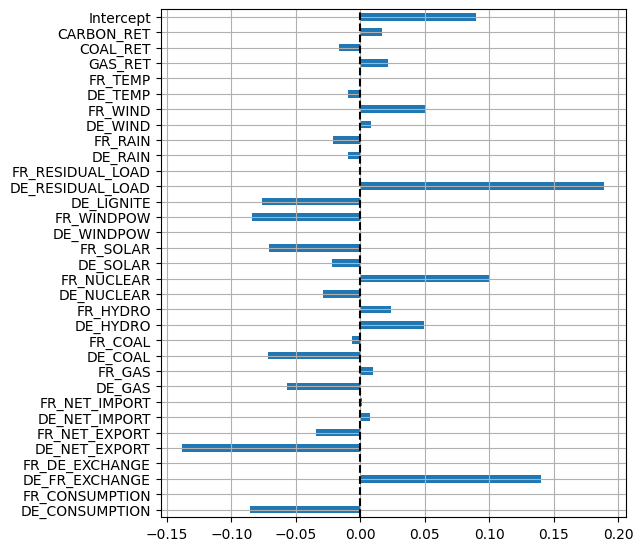

In [67]:
from models.linreg import *

lr = LassoRegressionModel(alpha=0.001)
lr.fit(F, y_train.TARGET)
fig, ax = lr.plot_coef()

In [77]:
from scripts.cross_validation import *

ridge_pen = [10**(i/2) for i in range(-6, 10)]
ridge_models = [RidgeRegressionModel(alpha=alpha, name=f"RidgeReg_{alpha:0.3g}") for alpha in ridge_pen]

lasso_pen = [10**(i/2) for i in range(-14, 3)]
lasso_models = [LassoRegressionModel(alpha=alpha, name=f"LassoReg_{alpha:0.3g}") for alpha in lasso_pen]


models = [LinearRegressionModel()] + ridge_models + lasso_models

CV = KFoldCrossValidation(models, k = 5)
CV.run(F, y_train.TARGET)

TRAIN: [ 299  300  301 ... 1491 1492 1493] TEST: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 2

/Users/nacimbouia/Documents/Travail/MVA-DataCh/ENS-Data-Challenge-Electricity-Prices-Forecast/.venv/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.639e+02, tolerance: 1.185e-01
  model = cd_fast.enet_coordinate_descent(
/Users/nacimbouia/Documents/Travail/MVA-DataCh/ENS-Data-Challenge-Electricity-Prices-Forecast/.venv/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.624e+02, tolerance: 1.185e-01
  model = cd_fast.enet_coordinate_descent(
/Users/nacimbouia/Documents/Travail/MVA-DataCh/ENS-Data-Challenge-Electricity-Prices-Forecast/.venv/lib/python3.9/site-package

TRAIN: [   0    1    2 ... 1491 1492 1493] TEST: [299 300 301 302 303 304 305 306 307 308 309 310 311 312 313 314 315 316
 317 318 319 320 321 322 323 324 325 326 327 328 329 330 331 332 333 334
 335 336 337 338 339 340 341 342 343 344 345 346 347 348 349 350 351 352
 353 354 355 356 357 358 359 360 361 362 363 364 365 366 367 368 369 370
 371 372 373 374 375 376 377 378 379 380 381 382 383 384 385 386 387 388
 389 390 391 392 393 394 395 396 397 398 399 400 401 402 403 404 405 406
 407 408 409 410 411 412 413 414 415 416 417 418 419 420 421 422 423 424
 425 426 427 428 429 430 431 432 433 434 435 436 437 438 439 440 441 442
 443 444 445 446 447 448 449 450 451 452 453 454 455 456 457 458 459 460
 461 462 463 464 465 466 467 468 469 470 471 472 473 474 475 476 477 478
 479 480 481 482 483 484 485 486 487 488 489 490 491 492 493 494 495 496
 497 498 499 500 501 502 503 504 505 506 507 508 509 510 511 512 513 514
 515 516 517 518 519 520 521 522 523 524 525 526 527 528 529 530 531 532
 5

/Users/nacimbouia/Documents/Travail/MVA-DataCh/ENS-Data-Challenge-Electricity-Prices-Forecast/.venv/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.903e+02, tolerance: 1.250e-01
  model = cd_fast.enet_coordinate_descent(
/Users/nacimbouia/Documents/Travail/MVA-DataCh/ENS-Data-Challenge-Electricity-Prices-Forecast/.venv/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.894e+02, tolerance: 1.250e-01
  model = cd_fast.enet_coordinate_descent(
/Users/nacimbouia/Documents/Travail/MVA-DataCh/ENS-Data-Challenge-Electricity-Prices-Forecast/.venv/lib/python3.9/site-package

TRAIN: [   0    1    2 ... 1491 1492 1493] TEST: [598 599 600 601 602 603 604 605 606 607 608 609 610 611 612 613 614 615
 616 617 618 619 620 621 622 623 624 625 626 627 628 629 630 631 632 633
 634 635 636 637 638 639 640 641 642 643 644 645 646 647 648 649 650 651
 652 653 654 655 656 657 658 659 660 661 662 663 664 665 666 667 668 669
 670 671 672 673 674 675 676 677 678 679 680 681 682 683 684 685 686 687
 688 689 690 691 692 693 694 695 696 697 698 699 700 701 702 703 704 705
 706 707 708 709 710 711 712 713 714 715 716 717 718 719 720 721 722 723
 724 725 726 727 728 729 730 731 732 733 734 735 736 737 738 739 740 741
 742 743 744 745 746 747 748 749 750 751 752 753 754 755 756 757 758 759
 760 761 762 763 764 765 766 767 768 769 770 771 772 773 774 775 776 777
 778 779 780 781 782 783 784 785 786 787 788 789 790 791 792 793 794 795
 796 797 798 799 800 801 802 803 804 805 806 807 808 809 810 811 812 813
 814 815 816 817 818 819 820 821 822 823 824 825 826 827 828 829 830 831
 8

/Users/nacimbouia/Documents/Travail/MVA-DataCh/ENS-Data-Challenge-Electricity-Prices-Forecast/.venv/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.337e+02, tolerance: 1.349e-01
  model = cd_fast.enet_coordinate_descent(
/Users/nacimbouia/Documents/Travail/MVA-DataCh/ENS-Data-Challenge-Electricity-Prices-Forecast/.venv/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.293e+02, tolerance: 1.349e-01
  model = cd_fast.enet_coordinate_descent(
/Users/nacimbouia/Documents/Travail/MVA-DataCh/ENS-Data-Challenge-Electricity-Prices-Forecast/.venv/lib/python3.9/site-package

TRAIN: [   0    1    2 ... 1491 1492 1493] TEST: [ 897  898  899  900  901  902  903  904  905  906  907  908  909  910
  911  912  913  914  915  916  917  918  919  920  921  922  923  924
  925  926  927  928  929  930  931  932  933  934  935  936  937  938
  939  940  941  942  943  944  945  946  947  948  949  950  951  952
  953  954  955  956  957  958  959  960  961  962  963  964  965  966
  967  968  969  970  971  972  973  974  975  976  977  978  979  980
  981  982  983  984  985  986  987  988  989  990  991  992  993  994
  995  996  997  998  999 1000 1001 1002 1003 1004 1005 1006 1007 1008
 1009 1010 1011 1012 1013 1014 1015 1016 1017 1018 1019 1020 1021 1022
 1023 1024 1025 1026 1027 1028 1029 1030 1031 1032 1033 1034 1035 1036
 1037 1038 1039 1040 1041 1042 1043 1044 1045 1046 1047 1048 1049 1050
 1051 1052 1053 1054 1055 1056 1057 1058 1059 1060 1061 1062 1063 1064
 1065 1066 1067 1068 1069 1070 1071 1072 1073 1074 1075 1076 1077 1078
 1079 1080 1081 1082 1083 10

/Users/nacimbouia/Documents/Travail/MVA-DataCh/ENS-Data-Challenge-Electricity-Prices-Forecast/.venv/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.848e+02, tolerance: 1.262e-01
  model = cd_fast.enet_coordinate_descent(
/Users/nacimbouia/Documents/Travail/MVA-DataCh/ENS-Data-Challenge-Electricity-Prices-Forecast/.venv/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.742e+02, tolerance: 1.262e-01
  model = cd_fast.enet_coordinate_descent(
/Users/nacimbouia/Documents/Travail/MVA-DataCh/ENS-Data-Challenge-Electricity-Prices-Forecast/.venv/lib/python3.9/site-package

TRAIN: [   0    1    2 ... 1193 1194 1195] TEST: [1196 1197 1198 1199 1200 1201 1202 1203 1204 1205 1206 1207 1208 1209
 1210 1211 1212 1213 1214 1215 1216 1217 1218 1219 1220 1221 1222 1223
 1224 1225 1226 1227 1228 1229 1230 1231 1232 1233 1234 1235 1236 1237
 1238 1239 1240 1241 1242 1243 1244 1245 1246 1247 1248 1249 1250 1251
 1252 1253 1254 1255 1256 1257 1258 1259 1260 1261 1262 1263 1264 1265
 1266 1267 1268 1269 1270 1271 1272 1273 1274 1275 1276 1277 1278 1279
 1280 1281 1282 1283 1284 1285 1286 1287 1288 1289 1290 1291 1292 1293
 1294 1295 1296 1297 1298 1299 1300 1301 1302 1303 1304 1305 1306 1307
 1308 1309 1310 1311 1312 1313 1314 1315 1316 1317 1318 1319 1320 1321
 1322 1323 1324 1325 1326 1327 1328 1329 1330 1331 1332 1333 1334 1335
 1336 1337 1338 1339 1340 1341 1342 1343 1344 1345 1346 1347 1348 1349
 1350 1351 1352 1353 1354 1355 1356 1357 1358 1359 1360 1361 1362 1363
 1364 1365 1366 1367 1368 1369 1370 1371 1372 1373 1374 1375 1376 1377
 1378 1379 1380 1381 1382 13

/Users/nacimbouia/Documents/Travail/MVA-DataCh/ENS-Data-Challenge-Electricity-Prices-Forecast/.venv/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.283e+02, tolerance: 1.346e-01
  model = cd_fast.enet_coordinate_descent(
/Users/nacimbouia/Documents/Travail/MVA-DataCh/ENS-Data-Challenge-Electricity-Prices-Forecast/.venv/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.267e+02, tolerance: 1.346e-01
  model = cd_fast.enet_coordinate_descent(
/Users/nacimbouia/Documents/Travail/MVA-DataCh/ENS-Data-Challenge-Electricity-Prices-Forecast/.venv/lib/python3.9/site-package

In [78]:
CV.scores

model,LinReg,RidgeReg_0.001,RidgeReg_0.00316,RidgeReg_0.01,RidgeReg_0.0316,RidgeReg_0.1,RidgeReg_0.316,RidgeReg_1,RidgeReg_3.16,RidgeReg_10,...,LassoReg_0.000316,LassoReg_0.001,LassoReg_0.00316,LassoReg_0.01,LassoReg_0.0316,LassoReg_0.1,LassoReg_0.316,LassoReg_1,LassoReg_3.16,LassoReg_10
fold_id,,,,,,,,,,,,,,,,,,,,,
fold_0,0.273662,0.273720,0.273556,0.273541,0.273557,0.273317,0.273170,0.273652,0.273922,0.277012,...,0.274267,0.277808,0.287940,0.300744,0.282682,0.256784,NaN,NaN,NaN,NaN
fold_1,0.161146,0.161217,0.161122,0.161208,0.162385,0.164742,0.166630,0.169690,0.169140,0.172902,...,0.171065,0.179212,0.181036,0.173447,0.152427,0.110223,NaN,NaN,NaN,NaN
fold_2,0.191949,0.191876,0.191854,0.192058,0.191652,0.192201,0.193655,0.193451,0.195411,0.196626,...,0.194625,0.196656,0.196760,0.182704,0.168432,0.170434,NaN,NaN,NaN,NaN
fold_3,0.225801,0.225822,0.225792,0.225608,0.225252,0.225165,0.224378,0.223615,0.223542,0.224473,...,0.226031,0.224962,0.228310,0.216906,0.201239,0.183504,NaN,NaN,NaN,NaN
fold_4,0.129930,0.129930,0.130218,0.130538,0.129940,0.129571,0.131247,0.133528,0.133742,0.135632,...,0.133888,0.135172,0.135844,0.142747,0.157056,0.144816,NaN,NaN,NaN,NaN


In [79]:
CV.scores.mean()

model
LinReg               0.196497
RidgeReg_0.001       0.196513
RidgeReg_0.00316     0.196508
RidgeReg_0.01        0.196591
RidgeReg_0.0316      0.196557
RidgeReg_0.1         0.196999
RidgeReg_0.316       0.197816
RidgeReg_1           0.198787
RidgeReg_3.16        0.199151
RidgeReg_10          0.201329
RidgeReg_31.6        0.203437
RidgeReg_100         0.207203
RidgeReg_316         0.209191
RidgeReg_1e+03       0.203151
RidgeReg_3.16e+03    0.194998
RidgeReg_1e+04       0.189826
RidgeReg_3.16e+04    0.186709
LassoReg_1e-07       0.197246
LassoReg_3.16e-07    0.197254
LassoReg_1e-06       0.197221
LassoReg_3.16e-06    0.197375
LassoReg_1e-05       0.197484
LassoReg_3.16e-05    0.197796
LassoReg_0.0001      0.198747
LassoReg_0.000316    0.199975
LassoReg_0.001       0.202762
LassoReg_0.00316     0.205978
LassoReg_0.01        0.203310
LassoReg_0.0316      0.192367
LassoReg_0.1         0.173152
LassoReg_0.316            NaN
LassoReg_1                NaN
LassoReg_3.16             NaN
Lass

<AxesSubplot: xlabel='model'>

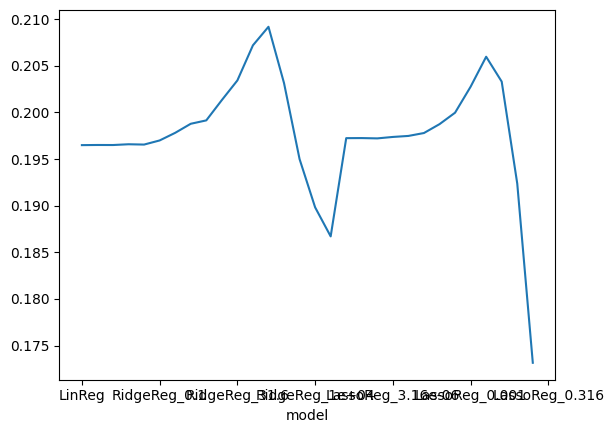

In [80]:
CV.scores.mean().plot()

(<Figure size 600x660 with 1 Axes>, <AxesSubplot: >)

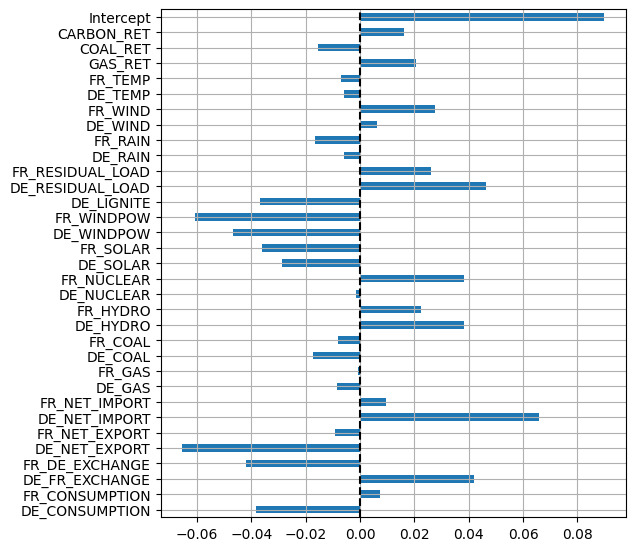

In [75]:
lr = RidgeRegressionModel(alpha=316)
lr.fit(F, y)
lr.plot_coef()